<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/w4d4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving IBM_2006-01-01_to_2018-01-01.csv to IBM_2006-01-01_to_2018-01-01.csv


{'IBM_2006-01-01_to_2018-01-01.csv': b'Date,Open,High,Low,Close,Volume,Name\r\n2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM\r\n2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM\r\n2006-01-05,81.4,82.9,81.0,82.5,7213500,IBM\r\n2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM\r\n2006-01-09,84.1,84.25,83.38,83.73,6858200,IBM\r\n2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM\r\n2006-01-11,84.37,84.81,83.4,84.17,5776500,IBM\r\n2006-01-12,83.82,83.96,83.4,83.57,4926500,IBM\r\n2006-01-13,83.0,83.45,82.5,83.17,6921700,IBM\r\n2006-01-17,82.8,83.16,82.54,83.0,8761700,IBM\r\n2006-01-18,84.0,84.7,83.52,84.46,11032800,IBM\r\n2006-01-19,84.14,84.39,83.02,83.09,6484000,IBM\r\n2006-01-20,83.04,83.05,81.25,81.36,8614500,IBM\r\n2006-01-23,81.33,81.92,80.92,81.41,6114100,IBM\r\n2006-01-24,81.39,82.15,80.8,80.85,6069000,IBM\r\n2006-01-25,81.05,81.62,80.61,80.91,6374300,IBM\r\n2006-01-26,81.5,81.65,80.59,80.72,7810200,IBM\r\n2006-01-27,80.75,81.77,80.75,81.02,6103400,IBM\r\n2006-01-30,80.21,81.81,80.21,81.63,5

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [6]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [7]:
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [9]:
# Splitting the data into training and test sets
training_set = dataset[:'2016'].iloc[:, 1:2].values  # Using the 'High' column
test_set = dataset['2017':].iloc[:, 1:2].values

In [10]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

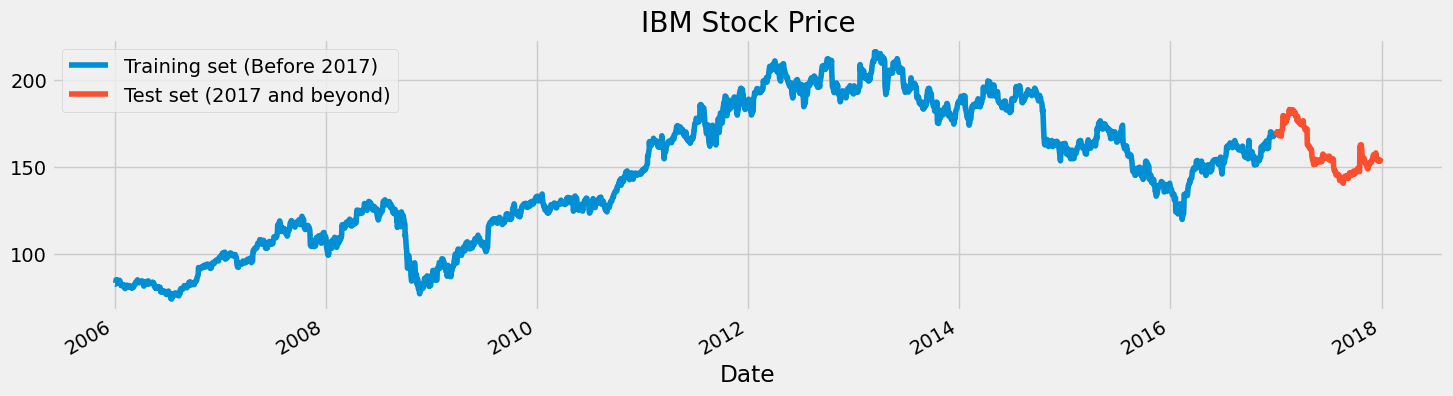

In [11]:
# Plotting the training and test sets
dataset["High"][:'2016'].plot(figsize=(16, 4), legend=True)
dataset["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM Stock Price')
plt.show()

In [12]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating the data structure with 60 timesteps
X_train = []
y_train = []
for i in range(60, 2769):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train for efficient modeling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Building the LSTM model
regressor = Sequential()

# First LSTM layer with Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# Training the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - loss: 0.0421
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 0.0102
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - loss: 0.0097
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 0.0068
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 0.0068
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0058
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - loss: 0.0053
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - loss: 0.0058
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0042
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - loss: 0.0041
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0040
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - loss: 0.0037
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0035
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - loss: 0.0034
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [15]:
# Preparing the test set
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


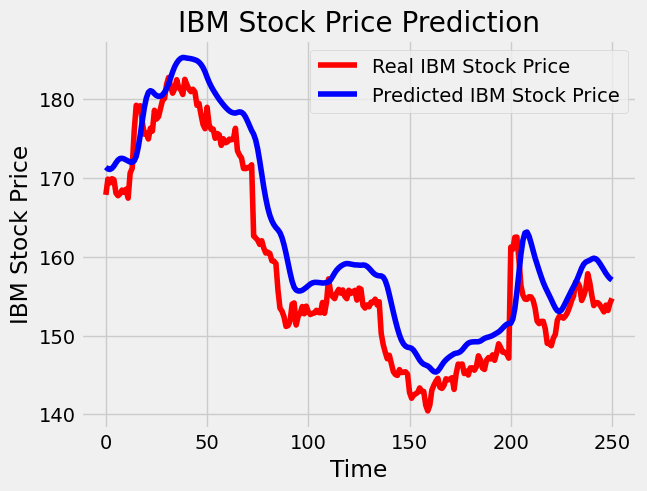

In [16]:
# Plotting the results
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real IBM Stock Price')
    plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted_stock_price)

In [17]:
# Calculating RMSE
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

return_rmse(test_set, predicted_stock_price)

The root mean squared error is 4.809617944632296.


In [19]:
# Building the GRU model
regressorGRU = Sequential()

# First GRU layer with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the model
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Training the model
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 361ms/step - loss: 0.2217
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - loss: 0.0592
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - loss: 0.0279
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - loss: 0.0076
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - loss: 0.0045
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - loss: 0.0040
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - loss: 0.0036
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 691ms/step - loss: 0.0036
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 300ms/step - loss: 0.0031
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - loss: 0.0032
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - loss: 0.0031
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - loss: 0.0036
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - loss: 0.0032
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - loss: 0.0031
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/s

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step


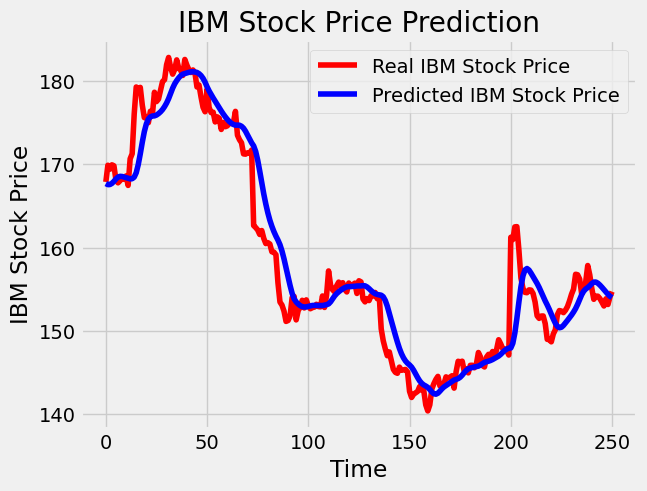

The root mean squared error is 3.1585197327168686.


In [20]:
# Making predictions
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

# Visualizing the results
plot_predictions(test_set, GRU_predicted_stock_price)

# Evaluating the model
return_rmse(test_set, GRU_predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━

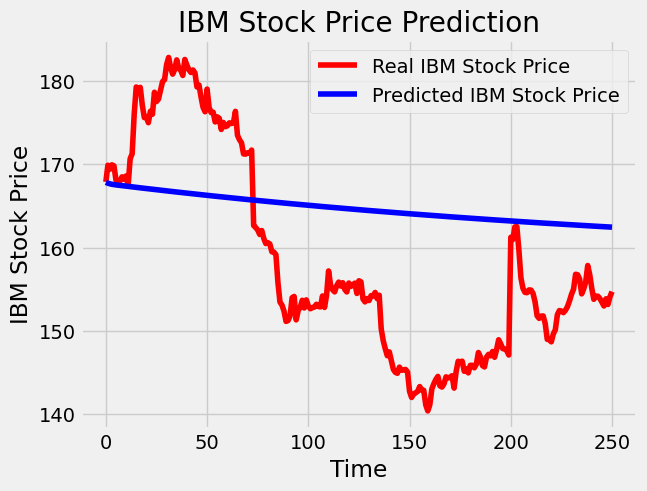

The root mean squared error is 12.645446188478894.


In [21]:
# Preparing sequence data
initial_sequence = X_train[2708, :]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(1, initial_sequence.shape[0], 1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence, new_prediction, axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251, 1))

# Visualizing the sequence
plot_predictions(test_set, sequence)

# Evaluating the sequence
return_rmse(test_set, sequence)